In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Exploring the Data

In [3]:
data.info()
#some columns have missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [4]:
data[data.isnull().any(axis=1)]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
#statistical overview of the data
data.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


<ipython-input-6-9d48008bfebb>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


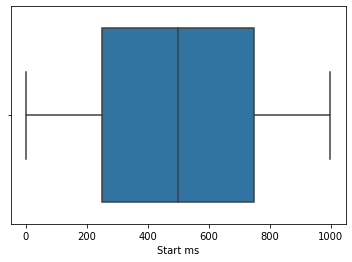

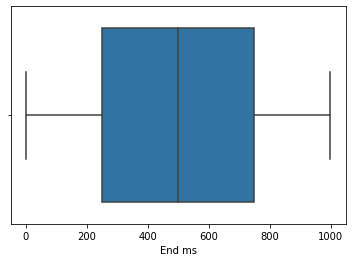

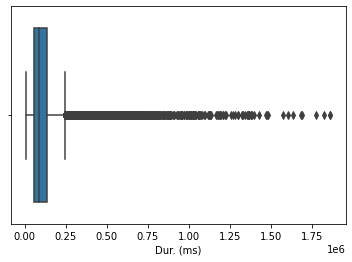

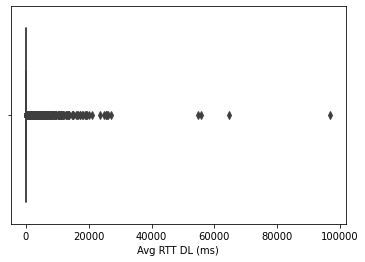

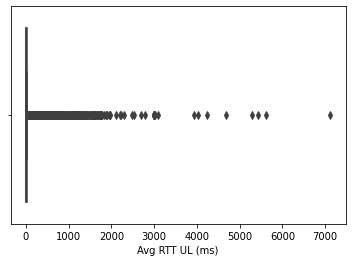

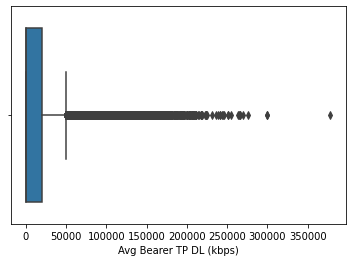

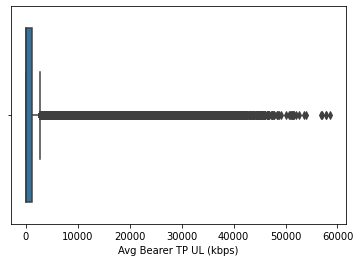

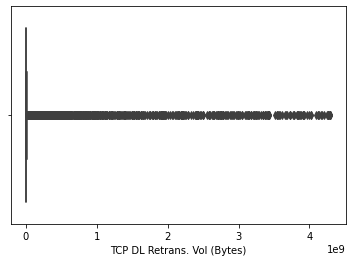

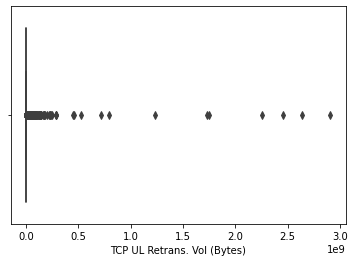

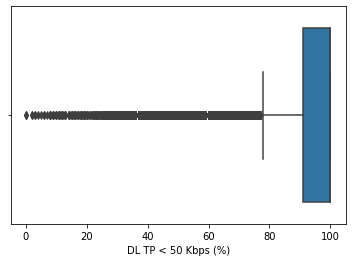

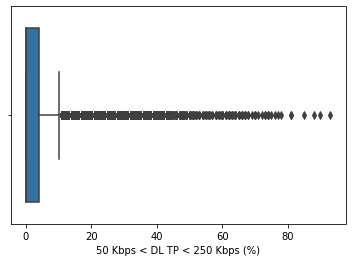

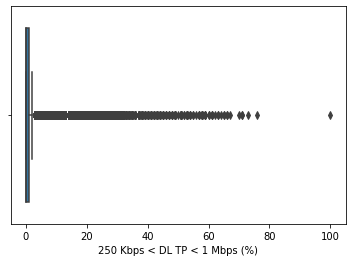

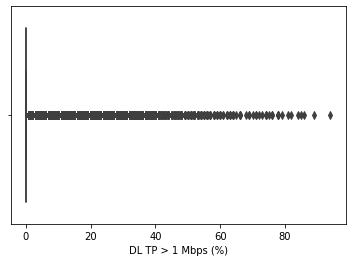

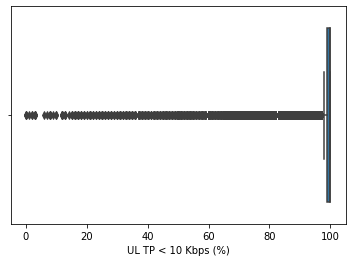

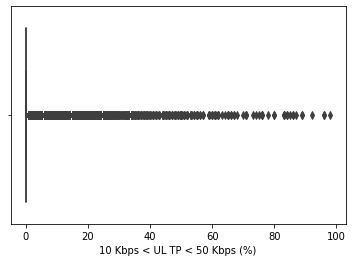

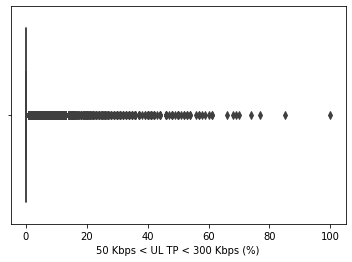

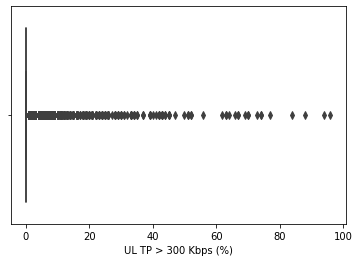

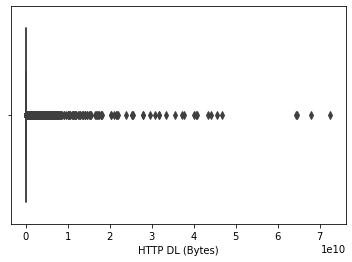

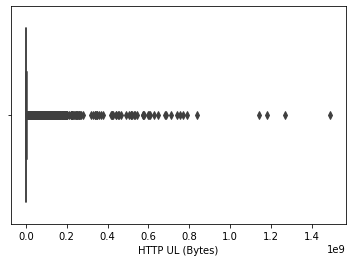

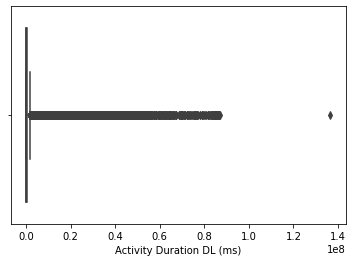

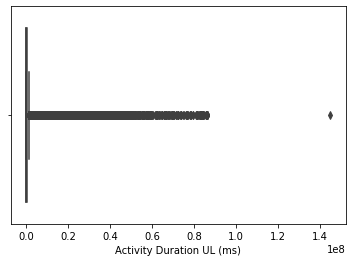

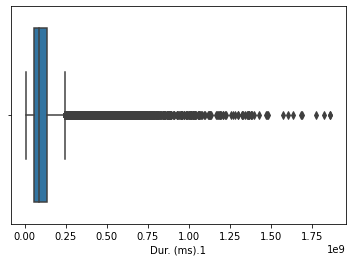

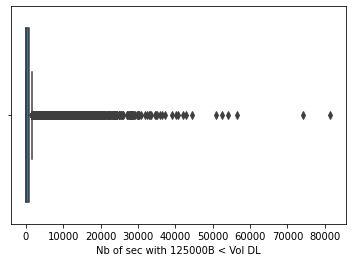

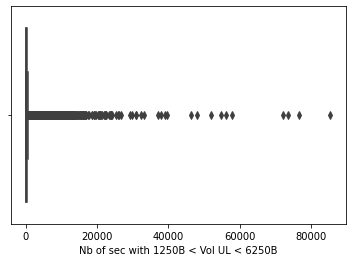

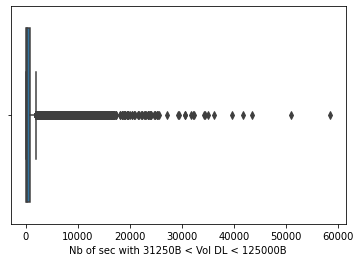

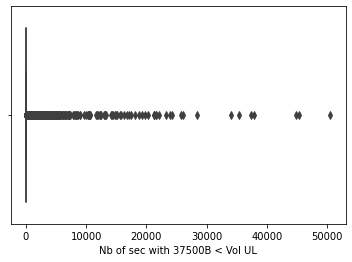

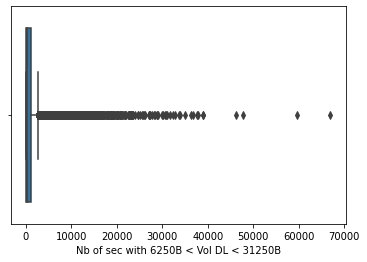

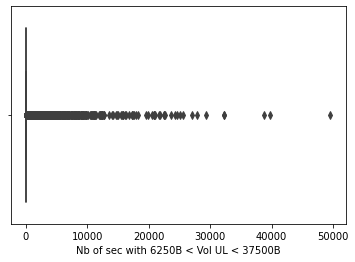

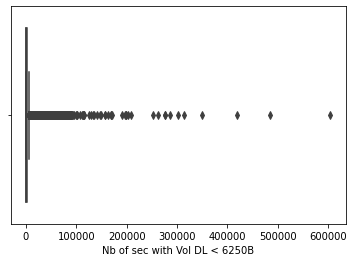

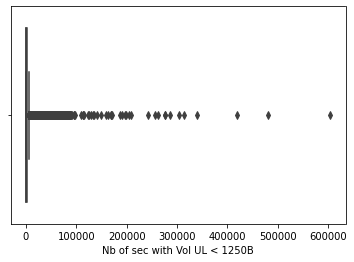

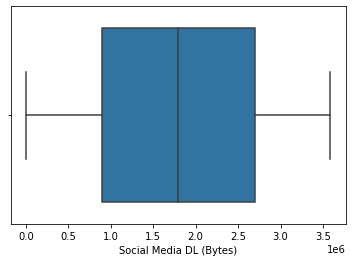

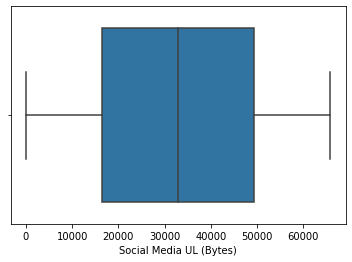

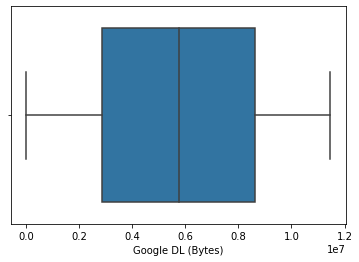

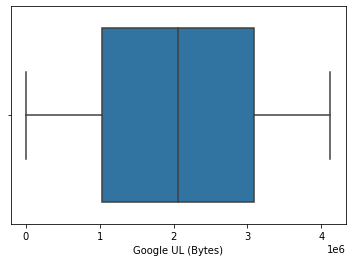

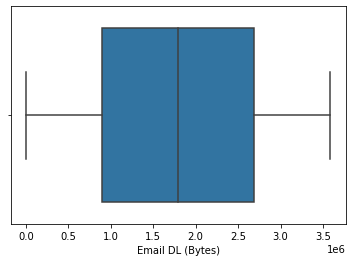

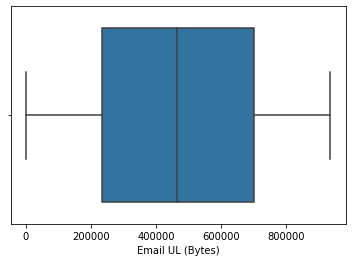

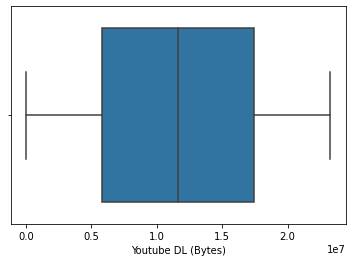

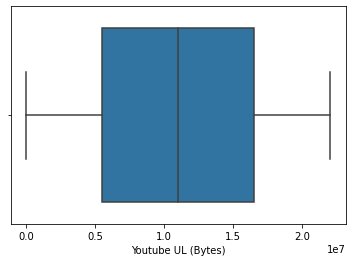

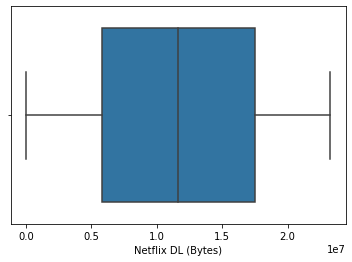

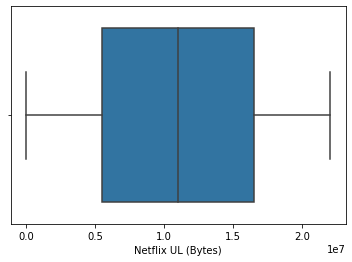

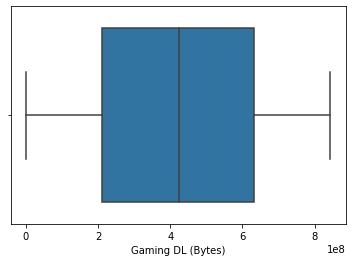

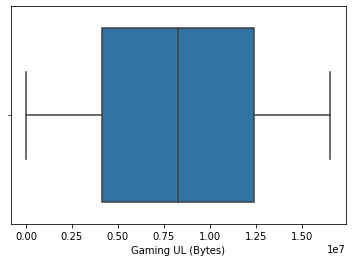

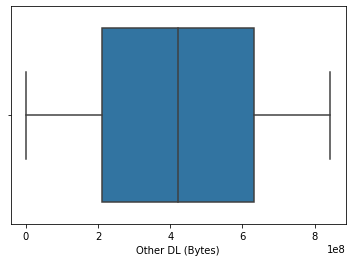

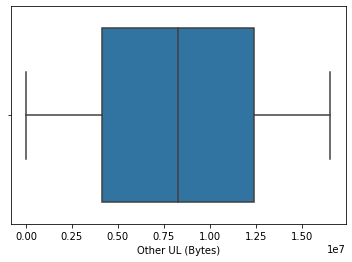

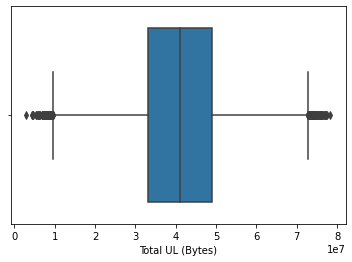

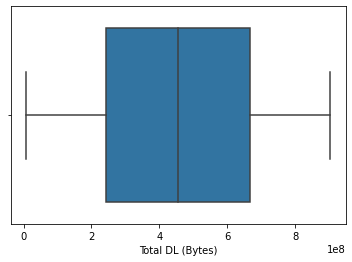

In [6]:
#identifying outliers in the dataset
#Using visual methods
import seaborn as sns
import matplotlib.pyplot as plt
data_numerical = data.drop(['Bearer Id','Start','End','Last Location Name','Handset Manufacturer','Handset Type','IMSI','IMEI','MSISDN/Number'],axis=1)
for i,col in enumerate(data_numerical):
    plt.figure(i)
    sns.boxplot(x=data[col])

In [7]:
data['Handset Type'].head(30)

0              Samsung Galaxy A5 Sm-A520F
1             Samsung Galaxy J5 (Sm-J530)
2                Samsung Galaxy A8 (2018)
3                               undefined
4                        Samsung Sm-G390F
5                               undefined
6                     Huawei Mate 20 Lite
7                               undefined
8                Samsung Galaxy A8 (2018)
9     Samsung Galaxy Note 8 (Sm-N950F Ds)
10                              undefined
11                        Huawei B593S-22
12             Samsung Galaxy A5 Sm-A520F
13    Samsung Galaxy Note 8 (Sm-N950F Ds)
14    Samsung Galaxy Note 8 (Sm-N950F Ds)
15            Samsung Galaxy J3 (Sm-J330)
16            Samsung Galaxy J5 (Sm-J530)
17            Samsung Galaxy J5 (Sm-J530)
18            Samsung Galaxy J5 (Sm-J530)
19           Samsung Galaxy S8 (Sm-G950F)
20                           Huawei E5180
21    Samsung Galaxy Note 8 (Sm-N950F Ds)
22                Apple iPhone 6S (A1688)
23            Samsung Galaxy A3 (S

In [8]:
data["Handset Manufacturer"].head(30)

0       Samsung
1       Samsung
2       Samsung
3     undefined
4       Samsung
5     undefined
6        Huawei
7     undefined
8       Samsung
9       Samsung
10    undefined
11       Huawei
12      Samsung
13      Samsung
14      Samsung
15      Samsung
16      Samsung
17      Samsung
18      Samsung
19      Samsung
20       Huawei
21      Samsung
22        Apple
23      Samsung
24      Samsung
25       Huawei
26      Samsung
27      Samsung
28      Samsung
29      Samsung
Name: Handset Manufacturer, dtype: object

In [9]:
data.drop('Bearer Id',axis=1).describe(include=['O'])

,Last Location Name,Handset Manufacturer,Handset Type
count,148848,149429,149429
unique,45547,170,1396
top,D41377B,Apple,Huawei B528S-23A
freq,80,59565,19752


In [10]:
data['Last Location Name'].head(15)

0         9164566995485190
1                  L77566A
2                  D42335A
3                  T21824A
4                  D88865A
5                  T89132C
6         9164567010589190
7     CELL_208_20_520025_1
8                  T42084A
9                  L20434C
10                 T29911A
11                 T21335C
12                 D76026B
13                 L20434C
14                 L20434C
Name: Last Location Name, dtype: object

In [11]:
#counting missing values in our dataframe
#both handset manufacturer and handset type have 572 missing values
data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
#both handset manufacturer and handset type have 572 missing values
#imputig with the most common class
data['Handset Manufacturer']=data['Handset Manufacturer'].fillna(data['Handset Manufacturer'].value_counts().index[0])
data['Handset Type']=data['Handset Type'].fillna(data['Handset Type'].value_counts().index[0])

In [13]:
print("Missing values in handset manufacturer are ",data['Handset Manufacturer'].isnull().sum())
print("Missing values in handset type are ",data['Handset Type'].isnull().sum())

Missing values in handset manufacturer are  0
Missing values in handset type are  0


In [14]:
#convert all the handset manufacturers to lowercase
data['Handset Manufacturer']=data['Handset Manufacturer'].str.lower()

In [15]:
data.drop(['Bearer Id','Last Location Name'],axis=1).describe(include=['O'])

,Handset Manufacturer,Handset Type
count,150001,150001
unique,154,1396
top,apple,Huawei B528S-23A
freq,60137,20324


In [16]:
#convert all the handset manufacturers to lowercase
data['Handset Type']=data['Handset Type'].str.lower()

In [17]:
data.drop(['Bearer Id','Last Location Name'],axis=1).describe(include=['O'])

,Handset Manufacturer,Handset Type
count,150001,150001
unique,154,1396
top,apple,huawei b528s-23a
freq,60137,20324


<AxesSubplot:>

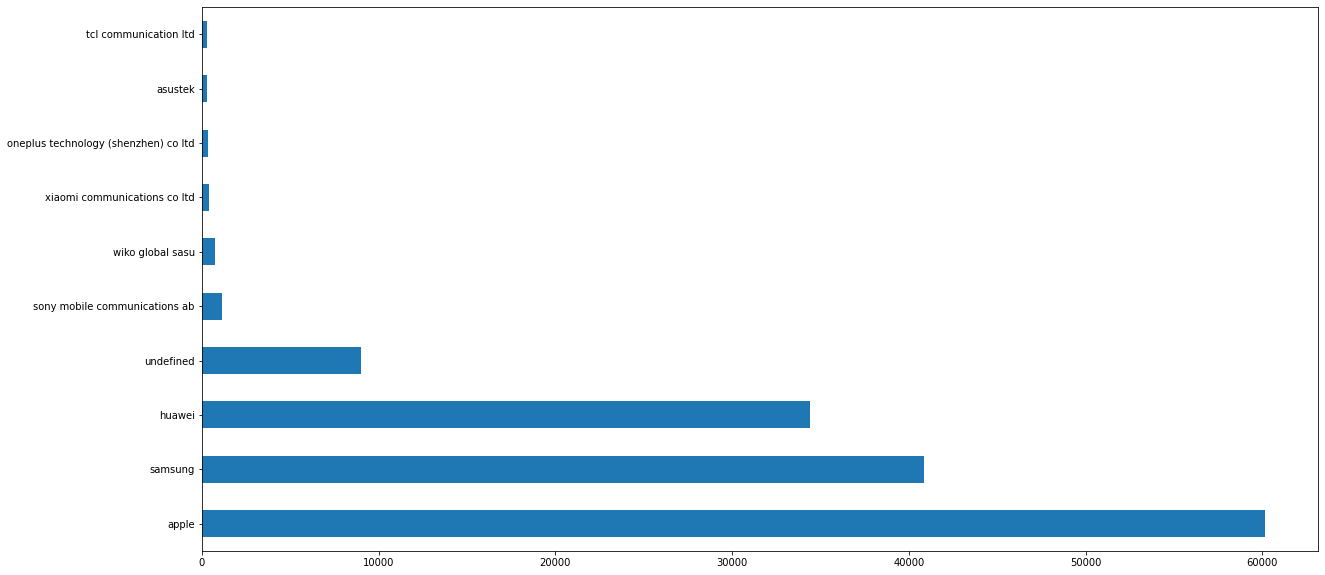

In [24]:
#Top 10 handset manufacturers
data['Handset Manufacturer'].value_counts().head(10).plot(kind='barh',figsize=(20,10))

<AxesSubplot:>

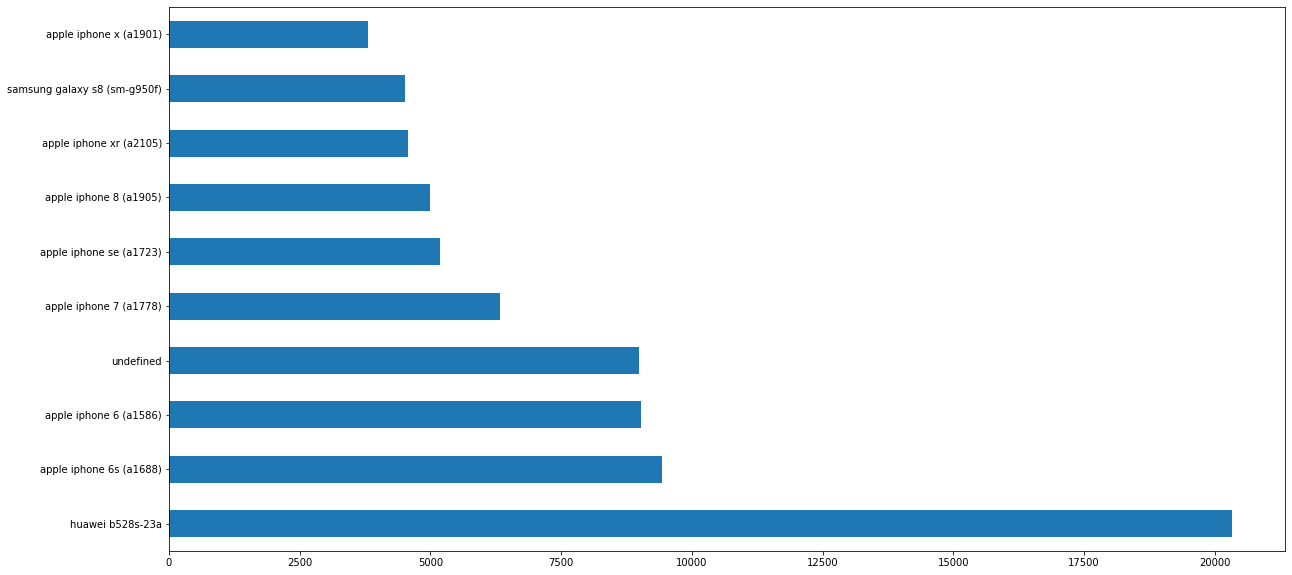

In [21]:
#Top 10 handset types
data['Handset Type'].value_counts().head(10).plot(kind='barh',figsize=(20,10))

Handset Manufacturer         Handset Type                                            
samsung                      samsung galaxy a5 sm-a520f                                   3724
                             samsung galaxy j5 (sm-j530)                                  3696
                             samsung galaxy a8 (2018)                                     2592
undefined                    undefined                                                    8987
samsung                      samsung sm-g390f                                              554
huawei                       huawei mate 20 lite                                           129
samsung                      samsung galaxy note 8 (sm-n950f ds)                            75
huawei                       huawei b593s-22                                                15
samsung                      samsung galaxy j3 (sm-j330)                                  3484
                             samsung galaxy s8 (sm-g950f)  

In [51]:
data['IMEI'].describe(include='all')

count    1.494290e+05
mean     4.847455e+13
std      2.241637e+13
min      4.400152e+11
25%      3.546071e+13
50%      3.572201e+13
75%      8.611970e+13
max      9.900120e+13
Name: IMEI, dtype: float64

In [63]:
multi_index = pd.pivot_table(data, index = ['Handset Manufacturer'],values= 'Handset Type', aggfunc = 'count') 
multi_index

,Handset Type
Handset Manufacturer,
a-link telecom international co limited,8
acer,14
adar,1
alif communications,1
apple,60137
...,...
yop technology co limited,1
yota devices,2
zebra technologies corp.,14


In [50]:
data['IMEI'].nunique()

107270

In [58]:

multi_index = pd.pivot_table(data, index = ['Social Media DL (Bytes)','Social Media UL (Bytes)'],values= 'IMEI', aggfunc = 'sum') 
multi_index

,,IMEI
Social Media DL (Bytes),Social Media UL (Bytes),
12.0,22822.0,8.637690e+13
28.0,62960.0,3.529841e+13
34.0,42776.0,3.590391e+13
41.0,63336.0,3.552121e+13
102.0,36483.0,3.542011e+13
...,...,...
3586000.0,34531.0,3.573541e+13
3586007.0,5087.0,3.552571e+13
3586034.0,51735.0,8.637690e+13


In [71]:
data2 = data.groupby(['Handset Type']).count()

In [74]:
data3 = data2['Handset Manufacturer']=='apple'

Handset Type
a-link telecom i. cubot a5                                                             False
a-link telecom i. cubot note plus                                                      False
a-link telecom i. cubot note s                                                         False
a-link telecom i. cubot nova                                                           False
a-link telecom i. cubot power                                                          False
                                                                                       ...  
zte starxtrem by sfr                                                                   False
zte zte blade c2 smartphone android by sfr startrail 4 zte blade flex t809 zte t809    False
zyxel communicat. lte7460                                                              False
zyxel communicat. sbg3600                                                              False
zyxel communicat. zyxel wah7706                          